In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("app1").getOrCreate()

In [4]:
from pyspark.sql import functions as F

In [12]:
data = [(1,"A"),(2,"B"),(3,"C")]

In [13]:
rdd = spark.sparkContext.parallelize(data)
df = rdd.toDF(["id","name"])
df.show()

+---+----+
| id|name|
+---+----+
|  1|   A|
|  2|   B|
|  3|   C|
+---+----+



# 1. col()

In [14]:
df.select(F.col("id")).show()

+---+
| id|
+---+
|  1|
|  2|
|  3|
+---+



# 2. lit()

In [15]:
df.withColumn("constant", F.lit(10)).show()

+---+----+--------+
| id|name|constant|
+---+----+--------+
|  1|   A|      10|
|  2|   B|      10|
|  3|   C|      10|
+---+----+--------+



# 3. when()

In [18]:
df.withColumn("id_even", F.when(F.col("id")%2==0,"yes").otherwise("no")).show()

+---+----+-------+
| id|name|id_even|
+---+----+-------+
|  1|   A|     no|
|  2|   B|    yes|
|  3|   C|     no|
+---+----+-------+



# 4. isNull()

In [21]:
data_2 = [(1,"A"),(2,"B"),(3,"C"),(4,None),(5,"A")]
df2 = spark.createDataFrame(data=data_2, schema=["id","name"])
df2.filter(F.col("name").isNull()).show()

+---+----+
| id|name|
+---+----+
|  4|NULL|
+---+----+



# 5. isNotNull()

In [22]:
df2.filter(F.col("name").isNotNull()).show()

+---+----+
| id|name|
+---+----+
|  1|   A|
|  2|   B|
|  3|   C|
|  5|   A|
+---+----+



# 6. between()

In [23]:
df2.filter(F.col("id").between(2,4)).show()

+---+----+
| id|name|
+---+----+
|  2|   B|
|  3|   C|
|  4|NULL|
+---+----+



# 7. like()

In [24]:
df2.filter(F.col("name").like("A%")).show()

+---+----+
| id|name|
+---+----+
|  1|   A|
|  5|   A|
+---+----+



# 8. rlike()

In [25]:
df2.filter(F.col("name").rlike("A.*")).show()

+---+----+
| id|name|
+---+----+
|  1|   A|
|  5|   A|
+---+----+



# 9. alias()

In [26]:
df2.select(F.col("name").alias("user_name")).show()

+---------+
|user_name|
+---------+
|        A|
|        B|
|        C|
|     NULL|
|        A|
+---------+



# 10. cast()

In [27]:
df2.withColumn("id_str", F.col("id").cast("string")).show()

+---+----+------+
| id|name|id_str|
+---+----+------+
|  1|   A|     1|
|  2|   B|     2|
|  3|   C|     3|
|  4|NULL|     4|
|  5|   A|     5|
+---+----+------+



# 11. expr()

In [30]:
df2.select(F.expr('id + 1')).show()

+--------+
|(id + 1)|
+--------+
|       2|
|       3|
|       4|
|       5|
|       6|
+--------+



# 12. count()

In [31]:
df2.select(F.count("id")).show()

+---------+
|count(id)|
+---------+
|        5|
+---------+



In [33]:
#since one row in name column is having Null value, it will not count that row for this column
df2.select(F.count("name")).show()

+-----------+
|count(name)|
+-----------+
|          4|
+-----------+



# 13. countDistinct()

In [34]:
df2.select(F.countDistinct("name")).show()

+--------------------+
|count(DISTINCT name)|
+--------------------+
|                   3|
+--------------------+



# 14. approx_count_distinct()

In [35]:
df2.select(F.approx_count_distinct("name")).show()

+---------------------------+
|approx_count_distinct(name)|
+---------------------------+
|                          3|
+---------------------------+



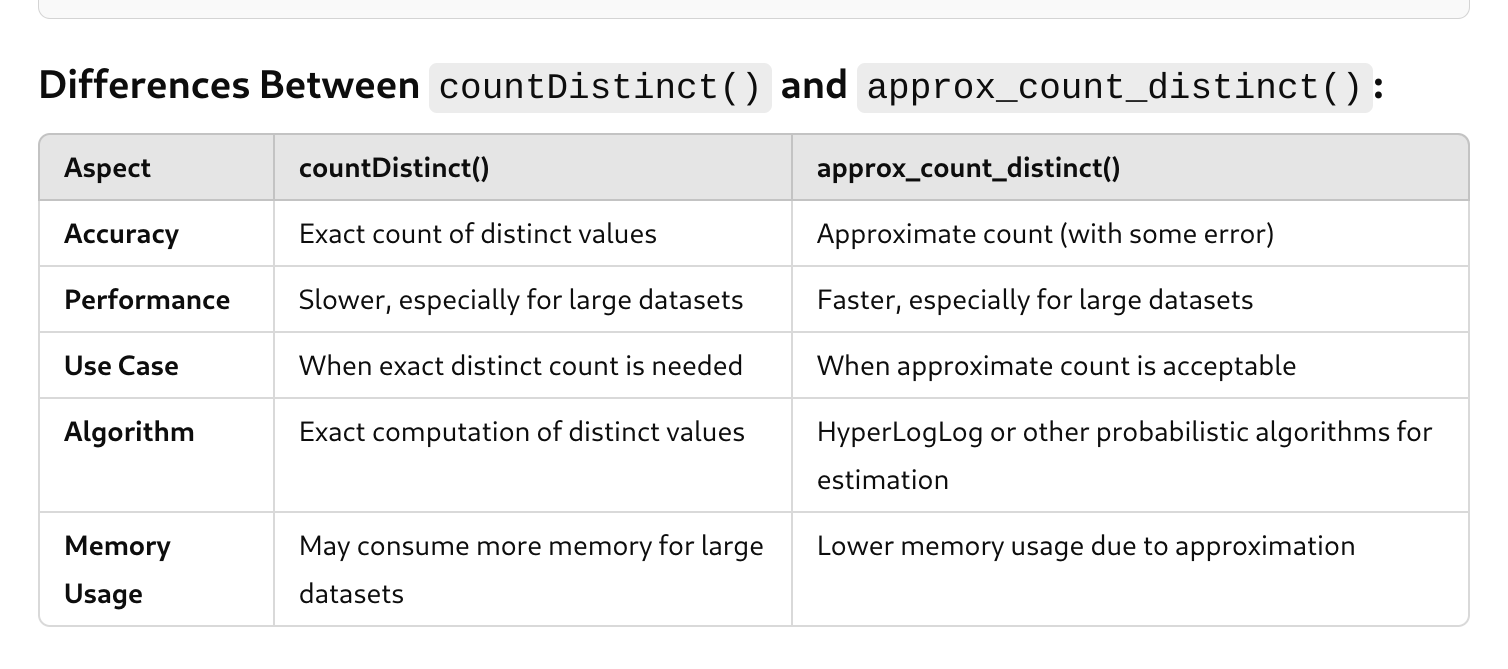


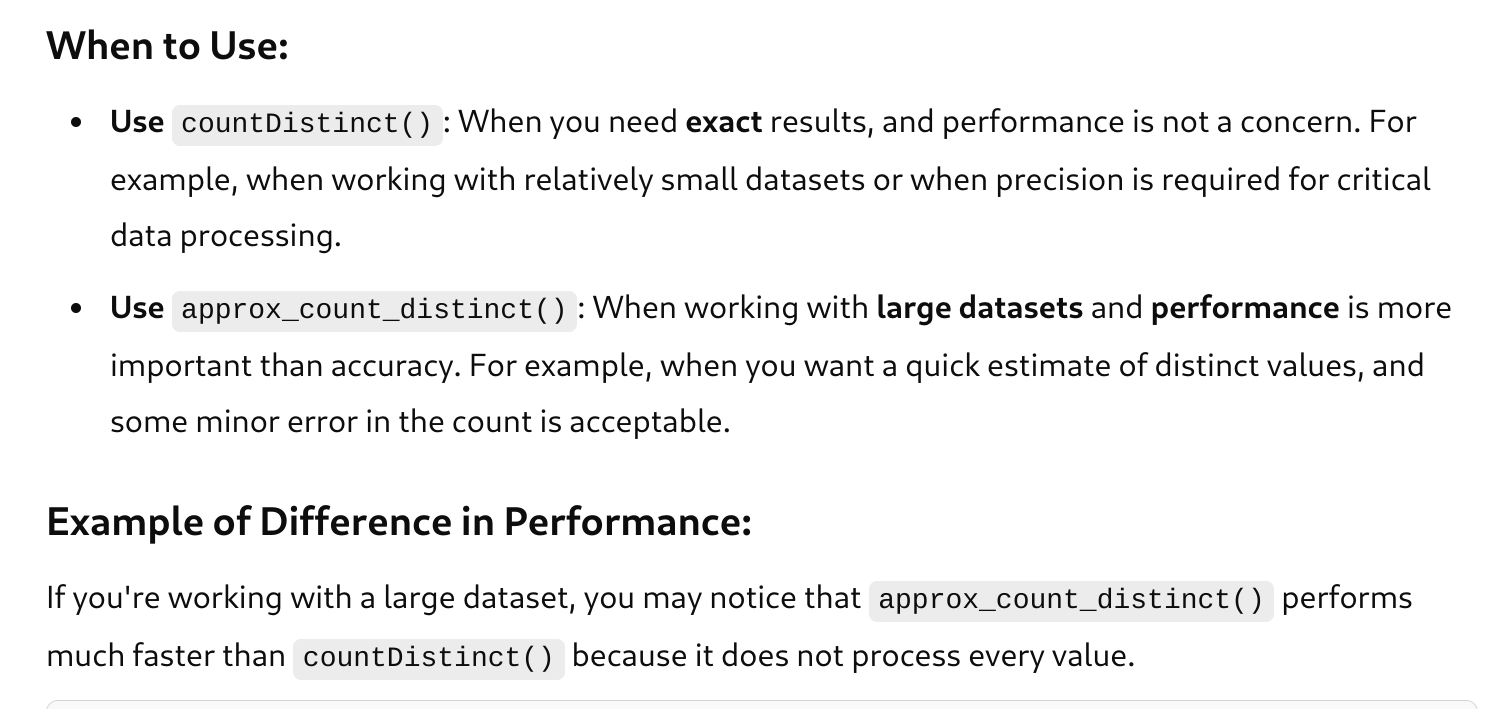

# 15. sum()

In [36]:
df2.select(F.sum("id")).show()

+-------+
|sum(id)|
+-------+
|     15|
+-------+



# 16. sumDistinct()

In [38]:
data_3 = [(1,"A"),(2,"B"),(1,None),(3,"C"),(3,"D")]
df3= spark.createDataFrame(data=data_3, schema=["id","name"])
df3.select(F.sumDistinct("id")).show()

/usr/local/lib/python3.11/dist-packages/pyspark/sql/functions.py:988: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+----------------+
|sum(DISTINCT id)|
+----------------+
|               6|
+----------------+



# 17. avg()

In [39]:
df3.select(F.avg("id")).show()

+-------+
|avg(id)|
+-------+
|    2.0|
+-------+



# 18. min()

In [40]:
df3.select(F.min("id")).show()

+-------+
|min(id)|
+-------+
|      1|
+-------+



# 19. max()

In [43]:
df3.select(F.max("id")).show()

+-------+
|max(id)|
+-------+
|      3|
+-------+



#20. first()

In [45]:
df3.select(F.first("name")).show()

+-----------+
|first(name)|
+-----------+
|          A|
+-----------+



# 21. last()

In [47]:
df3.select(F.last("name")).show()

+----------+
|last(name)|
+----------+
|         D|
+----------+



# 22. stddev()

In [49]:
df3.select(F.stddev("id")).show()

+----------+
|stddev(id)|
+----------+
|       1.0|
+----------+



# 23. variance()

In [50]:
df3.select(F.variance("id")).show()

+------------+
|var_samp(id)|
+------------+
|         1.0|
+------------+



# 24. collect_list()

In [54]:
data_4 = [(1,"A"),(2,"B"),(2,"A"),(3,None),(None,"D"),(1,"D"),(1,"D"),(3,"D")]
df4 = spark.createDataFrame(data= data_4, schema=["id","name"])
df4.groupBy("name").agg(F.collect_list("id")).show()

+----+----------------+
|name|collect_list(id)|
+----+----------------+
|NULL|             [3]|
|   B|             [2]|
|   A|          [1, 2]|
|   D|       [1, 1, 3]|
+----+----------------+



# 25. collect_set()

In [55]:
df4.groupBy("name").agg(F.collect_set("id")).show()

+----+---------------+
|name|collect_set(id)|
+----+---------------+
|NULL|            [3]|
|   B|            [2]|
|   A|         [1, 2]|
|   D|         [1, 3]|
+----+---------------+



# 26. corr(): *Calculates the correlation between two columns*

In [56]:
df4.select(F.corr("id","name")).show()

+--------------+
|corr(id, name)|
+--------------+
|          NULL|
+--------------+



# 27. covar_pop(): Calculates the population covariance between two columns

In [57]:
df4.select(F.covar_pop("id","name")).show()

+-------------------+
|covar_pop(id, name)|
+-------------------+
|               NULL|
+-------------------+



# 28. covar_samp(): Calculates the sample covariance between two columns

In [58]:
df.select(F.covar_samp("id", "name")).show()

+--------------------+
|covar_samp(id, name)|
+--------------------+
|                NULL|
+--------------------+



# 29. kurtosis(): Calculate the kurtosis of a column

In [59]:
df4.select(F.kurtosis("id")).show()

+-------------------+
|       kurtosis(id)|
+-------------------+
|-1.5069204152249125|
+-------------------+



# 30. skewness(): Calculates the skewness of a column

In [64]:
df4.select(F.skewness("id")).show()

+------------------+
|      skewness(id)|
+------------------+
|0.2723801058145724|
+------------------+



# 31. approxQuantile(): Calculates approximate quantiles of a column

In [67]:
df4.approxQuantile("id", [0.25, 0.5, 0.75], 0.1)

[1.0, 2.0, 3.0]

# 32. rank(): Assigns a rank to each row based on the window specification

In [68]:
from pyspark.sql.window import Window

In [69]:
windowSpec = Window.orderBy("id")
df4.withColumn("rank",F.rank().over(windowSpec)).show()

+----+----+----+
|  id|name|rank|
+----+----+----+
|NULL|   D|   1|
|   1|   A|   2|
|   1|   D|   2|
|   1|   D|   2|
|   2|   B|   5|
|   2|   A|   5|
|   3|NULL|   7|
|   3|   D|   7|
+----+----+----+



# 33. rank(): Assigns a dense rank (without gaps) to each row based on the window specification

In [70]:
df4.withColumn("dense_rank", F.dense_rank().over(windowSpec)).show()

+----+----+----------+
|  id|name|dense_rank|
+----+----+----------+
|NULL|   D|         1|
|   1|   A|         2|
|   1|   D|         2|
|   1|   D|         2|
|   2|   B|         3|
|   2|   A|         3|
|   3|NULL|         4|
|   3|   D|         4|
+----+----+----------+



# 34. ntile(): Divides the data into n buckets and assigns a bucket number to each row

In [71]:
df4.withColumn("ntile", F.ntile(2).over(windowSpec)).show()

+----+----+-----+
|  id|name|ntile|
+----+----+-----+
|NULL|   D|    1|
|   1|   A|    1|
|   1|   D|    1|
|   1|   D|    1|
|   2|   B|    2|
|   2|   A|    2|
|   3|NULL|    2|
|   3|   D|    2|
+----+----+-----+



# 35. row_number(): Assigns a unique row number to each row

In [72]:
df4.withColumn("row_number", F.row_number().over(windowSpec)).show()

+----+----+----------+
|  id|name|row_number|
+----+----+----------+
|NULL|   D|         1|
|   1|   A|         2|
|   1|   D|         3|
|   1|   D|         4|
|   2|   B|         5|
|   2|   A|         6|
|   3|NULL|         7|
|   3|   D|         8|
+----+----+----------+



# 36. lead(): Accesses the value of a column in the next row

In [73]:
df4.withColumn("next_id", F.lead("id").over(windowSpec)).show()

+----+----+-------+
|  id|name|next_id|
+----+----+-------+
|NULL|   D|      1|
|   1|   A|      1|
|   1|   D|      1|
|   1|   D|      2|
|   2|   B|      2|
|   2|   A|      3|
|   3|NULL|      3|
|   3|   D|   NULL|
+----+----+-------+



# 37. lag(): Accesses the value of a column in the previous row

In [74]:
df4.withColumn("prev_id", F.lag("id").over(windowSpec)).show()

+----+----+-------+
|  id|name|prev_id|
+----+----+-------+
|NULL|   D|   NULL|
|   1|   A|   NULL|
|   1|   D|      1|
|   1|   D|      1|
|   2|   B|      1|
|   2|   A|      2|
|   3|NULL|      2|
|   3|   D|      3|
+----+----+-------+



# 38. percent_rank(): Calculates the percentile rank of each row based on the window specification

In [75]:
df4.withColumn("percent_rank", F.percent_rank().over(windowSpec)).show()

+----+----+-------------------+
|  id|name|       percent_rank|
+----+----+-------------------+
|NULL|   D|                0.0|
|   1|   A|0.14285714285714285|
|   1|   D|0.14285714285714285|
|   1|   D|0.14285714285714285|
|   2|   B| 0.5714285714285714|
|   2|   A| 0.5714285714285714|
|   3|NULL| 0.8571428571428571|
|   3|   D| 0.8571428571428571|
+----+----+-------------------+



# 39. window()

In [76]:
# This function is used to define a window specification,
# which is typically used in conjunction with window functions
# such as rank(), dense_rank(), row_number(), etc.
# This has already been shown in some examples above (e.g- Window.orderBy("id"))